In [1]:
#This dataset aims to predict if a patient has diabetes based on certain criteria 
#In this notebook: 
#Data exploration 
#preprocessing 
#training and testing 
#Evaluating 

In [21]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
ds = pd.read_csv("diabetes.csv") 

In [4]:
ds.head()

PatientID  Pregnancies  PlasmaGlucose  DiastolicBloodPressure  \
0    1354778            0            171                      80   
1    1147438            8             92                      93   
2    1640031            7            115                      47   
3    1883350            9            103                      78   
4    1424119            1             85                      59   

   TricepsThickness  SerumInsulin        BMI  DiabetesPedigree  Age  Diabetic  
0                34            23  43.509726          1.213191   21         0  
1                47            36  21.240576          0.158365   23         0  
2                52            35  41.511523          0.079019   23         0  
3                25           304  29.582192          1.282870   43         1  
4                27            35  42.604536          0.549542   22         0

In [5]:
ds.describe()

PatientID   Pregnancies  PlasmaGlucose  DiastolicBloodPressure  \
count  1.500000e+04  15000.000000   15000.000000            15000.000000   
mean   1.502922e+06      3.224533     107.856867               71.220667   
std    2.892534e+05      3.391020      31.981975               16.758716   
min    1.000038e+06      0.000000      44.000000               24.000000   
25%    1.252866e+06      0.000000      84.000000               58.000000   
50%    1.505508e+06      2.000000     104.000000               72.000000   
75%    1.755205e+06      6.000000     129.000000               85.000000   
max    1.999997e+06     14.000000     192.000000              117.000000   

       TricepsThickness  SerumInsulin           BMI  DiabetesPedigree  \
count      15000.000000  15000.000000  15000.000000      15000.000000   
mean          28.814000    137.852133     31.509646          0.398968   
std           14.555716    133.068252      9.759000          0.377944   
min            7.000000     14.000000     18.200512          0.078044   
25%           15.000000     39.000000     21.259887          0.137743   
50%           31.000000     83.000000     31.767940          0.200297   
75%           41.000000    195.000000     39.259692          0.616285   
max           93.000000    799.000000     56.034628          2.301594   

                Age      Diabetic  
count  15000.000000  15000.000000  
mean      30.137733      0.333333  
std       12.089703      0.471420  
min       21.000000      0.000000  
25%       22.000000      0.000000  
50%       24.000000      0.000000  
75%       35.000000      1.000000  
max       77.000000      1.000000

In [6]:
ds.dtypes

PatientID                   int64
Pregnancies                 int64
PlasmaGlucose               int64
DiastolicBloodPressure      int64
TricepsThickness            int64
SerumInsulin                int64
BMI                       float64
DiabetesPedigree          float64
Age                         int64
Diabetic                    int64
dtype: object

In [7]:
null_values = ds.isnull().sum()
null_values

PatientID                 0
Pregnancies               0
PlasmaGlucose             0
DiastolicBloodPressure    0
TricepsThickness          0
SerumInsulin              0
BMI                       0
DiabetesPedigree          0
Age                       0
Diabetic                  0
dtype: int64

In [8]:
dataset = ds.drop(['PatientID'], axis =1)

In [9]:
dataset.head()

Pregnancies  PlasmaGlucose  DiastolicBloodPressure  TricepsThickness  \
0            0            171                      80                34   
1            8             92                      93                47   
2            7            115                      47                52   
3            9            103                      78                25   
4            1             85                      59                27   

   SerumInsulin        BMI  DiabetesPedigree  Age  Diabetic  
0            23  43.509726          1.213191   21         0  
1            36  21.240576          0.158365   23         0  
2            35  41.511523          0.079019   23         0  
3           304  29.582192          1.282870   43         1  
4            35  42.604536          0.549542   22         0

In [10]:
dataset.tail()

Pregnancies  PlasmaGlucose  DiastolicBloodPressure  TricepsThickness  \
14995           10             65                      60                46   
14996            2             73                      66                27   
14997            0             93                      89                43   
14998            0            132                      98                18   
14999            3            114                      65                47   

       SerumInsulin        BMI  DiabetesPedigree  Age  Diabetic  
14995           177  33.512468          0.148327   41         1  
14996           168  30.132636          0.862252   38         1  
14997            57  18.690683          0.427049   24         0  
14998           161  19.791645          0.302257   23         0  
14999           512  36.215437          0.147363   34         1

In [13]:
corelation = dataset.corr()
corelation


Pregnancies  PlasmaGlucose  DiastolicBloodPressure  \
Pregnancies                1.000000       0.054502                0.043528   
PlasmaGlucose              0.054502       1.000000                0.007212   
DiastolicBloodPressure     0.043528       0.007212                1.000000   
TricepsThickness           0.063605       0.027100                0.011106   
SerumInsulin               0.104487       0.033545                0.022649   
BMI                        0.086386       0.020653                0.015873   
DiabetesPedigree           0.054240       0.009057                0.014099   
Age                        0.136972       0.038864                0.041333   
Diabetic                   0.407315       0.128004                0.091307   

                        TricepsThickness  SerumInsulin       BMI  \
Pregnancies                     0.063605      0.104487  0.086386   
PlasmaGlucose                   0.027100      0.033545  0.020653   
DiastolicBloodPressure          0.011106      0.022649  0.015873   
TricepsThickness                1.000000      0.029688  0.024745   
SerumInsulin                    0.029688      1.000000  0.051223   
BMI                             0.024745      0.051223  1.000000   
DiabetesPedigree               -0.000951      0.046324  0.028868   
Age                             0.061383      0.088007  0.062910   
Diabetic                        0.152505      0.247375  0.210508   

                        DiabetesPedigree       Age  Diabetic  
Pregnancies                     0.054240  0.136972  0.407315  
PlasmaGlucose                   0.009057  0.038864  0.128004  
DiastolicBloodPressure          0.014099  0.041333  0.091307  
TricepsThickness               -0.000951  0.061383  0.152505  
SerumInsulin                    0.046324  0.088007  0.247375  
BMI                             0.028868  0.062910  0.210508  
DiabetesPedigree                1.000000  0.055633  0.170302  
Age                             0.055633  1.000000  0.342605  
Diabetic                        0.170302  0.342605  1.000000

In [16]:
# Pregnancies, Age, SerumInsulin and BMI have the highest corelations 
# will drop DBP, diabetes_pedigree and tricep thickness 


In [17]:
dataset = dataset.drop(['DiastolicBloodPressure', 'TricepsThickness', 'DiabetesPedigree'], axis =1)

In [18]:
dataset.head()

Pregnancies  PlasmaGlucose  SerumInsulin        BMI  Age  Diabetic
0            0            171            23  43.509726   21         0
1            8             92            36  21.240576   23         0
2            7            115            35  41.511523   23         0
3            9            103           304  29.582192   43         1
4            1             85            35  42.604536   22         0

In [ ]:
##okay lets explore some of the relationships 

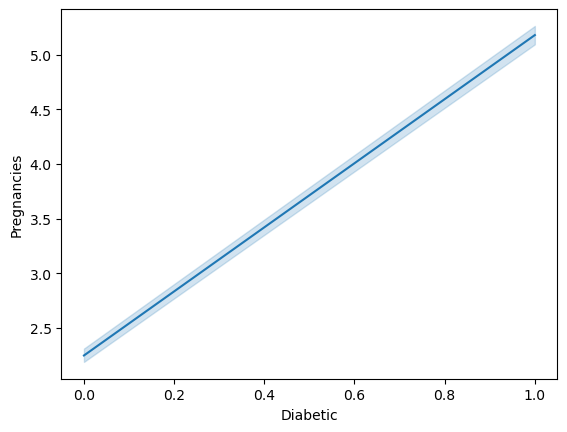

In [27]:
sns.lineplot(x = "Diabetic", y="Pregnancies", data=dataset)
plt.show()

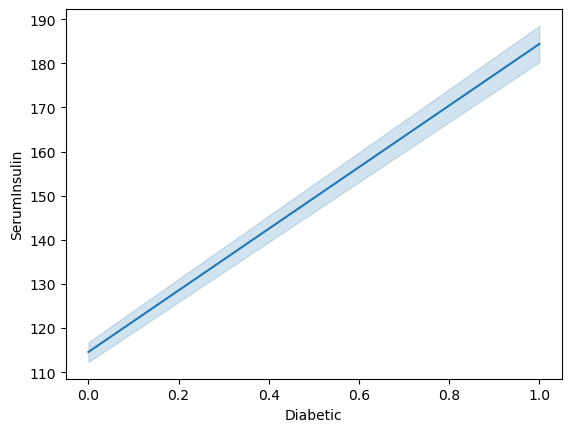

In [35]:
sns.lineplot(x = "Diabetic", y="SerumInsulin", data=dataset)
plt.show()

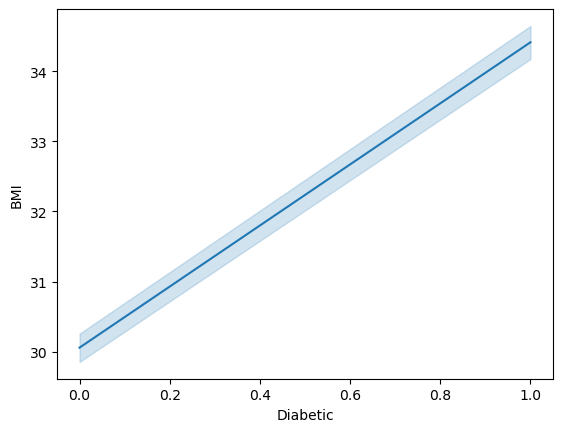

In [36]:
sns.lineplot(x = "Diabetic", y="BMI", data=dataset)
plt.show()

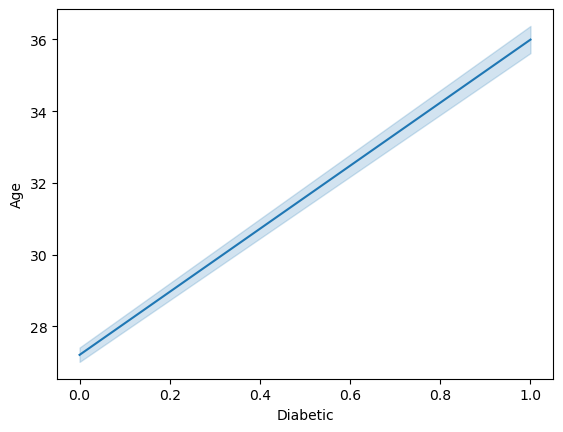

In [37]:
sns.lineplot(x = "Diabetic", y="Age", data=dataset)
plt.show()

In [ ]:
### Lets get to training and testing 


In [38]:
dataset = dataset.rename(columns={'Diabetic': 'Label'}) 

In [39]:
dataset.head()

Pregnancies  PlasmaGlucose  SerumInsulin        BMI  Age  Label
0            0            171            23  43.509726   21      0
1            8             92            36  21.240576   23      0
2            7            115            35  41.511523   23      0
3            9            103           304  29.582192   43      1
4            1             85            35  42.604536   22      0

In [48]:
from sklearn.model_selection import train_test_split , cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler  
#models 
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier 
from sklearn import svm #other model I have chosen, (dependancy, might have to install)

#evaluation 
from sklearn.metrics import confusion_matrix, accuracy_score, confusion_matrix

X = dataset.iloc[:,:-1].values #(feature matrix)
y = dataset.iloc[:,-1].values  # (label) 



In [49]:
print(X)


[[  0.         171.          23.          43.50972593  21.        ]
 [  8.          92.          36.          21.24057571  23.        ]
 [  7.         115.          35.          41.51152348  23.        ]
 ...
 [  0.          93.          57.          18.69068305  24.        ]
 [  0.         132.         161.          19.7916451   23.        ]
 [  3.         114.         512.          36.21543653  34.        ]]


In [50]:
print(y)

[0 0 0 ... 0 0 1]


In [51]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.25) 

In [52]:
print(Xtrain)

[[  0.          93.          43.          22.02928347  21.        ]
 [  1.          94.         146.          46.7220133   24.        ]
 [  9.         116.         227.          26.8614624   21.        ]
 ...
 [  0.          58.         151.          19.50898164  24.        ]
 [  7.          69.          23.          42.61205272  22.        ]
 [  3.         103.          87.          32.52300652  46.        ]]


In [53]:
print(Xtest)

[[  2.         145.          56.          42.68980995  54.        ]
 [  0.         108.         157.          41.85032109  22.        ]
 [  6.         123.          43.          20.83186034  32.        ]
 ...
 [  6.         159.          19.          19.90799503  23.        ]
 [  1.         118.         382.          40.58391953  23.        ]
 [  1.          73.          21.          21.83516638  49.        ]]


In [55]:
sc = StandardScaler()
Xtrain_scaled = sc.fit_transform(Xtrain) 
Xtest_scaled = sc.transform(Xtest)  


In [56]:
print(Xtrain_scaled)

[[-0.9565465  -0.47369682 -0.70805303 -0.96719868 -0.7533744 ]
 [-0.66117834 -0.44236914  0.0639095   1.56206332 -0.50570354]
 [ 1.70176694  0.24683985  0.67098684 -0.47224139 -0.7533744 ]
 ...
 [-0.9565465  -1.57016566  0.10138341 -1.22535173 -0.50570354]
 [ 1.11103062 -1.22556116 -0.85794867  1.14108244 -0.67081745]
 [-0.07044202 -0.16042001 -0.37828263  0.10766729  1.31054945]]


In [57]:
print(Xtest_scaled)

[[-0.36581018  1.1553426  -0.61062087  1.14904707  1.97100508]
 [-0.9565465  -0.0037816   0.14635211  1.06305871 -0.67081745]
 [ 0.81566246  0.46613362 -0.70805303 -1.08985003  0.15475209]
 ...
 [ 0.81566246  1.59393014 -0.8879278  -1.18448102 -0.58826049]
 [-0.66117834  0.30949521  1.83267804  0.93334193 -0.58826049]
 [-0.66117834 -1.10025044 -0.87293824 -0.98708198  1.55822031]]


In [58]:
RF_Classifier = RandomForestClassifier(n_estimators =100, criterion = "entropy", random_state=0)
RF_Classifier.fit(Xtrain_scaled, ytrain)

RandomForestClassifier(criterion='entropy', random_state=0)

In [61]:
pred_RF = RF_Classifier.predict(Xtest_scaled)


In [64]:
print(np.concatenate((pred_RF.reshape(len(pred_RF),1),ytest.reshape(len(ytest),1)),1))

[[1 1]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 1]
 [0 0]]


In [65]:
## eval 
print("accuracy of model:", accuracy_score(ytest, pred_RF))

accuracy of model: 0.9384
